# rectified-linear unit (ReLU)
The rectified-linear unit (also called `ReLU()`) is defined as follows:

$$
\begin{align*}
ReLU(x) & = max\{x, 0\} \\
\text{where, } & x \in \mathbb{R}
\end{align*}
$$

In [18]:
import numpy as np
from matplotlib import pyplot as plt

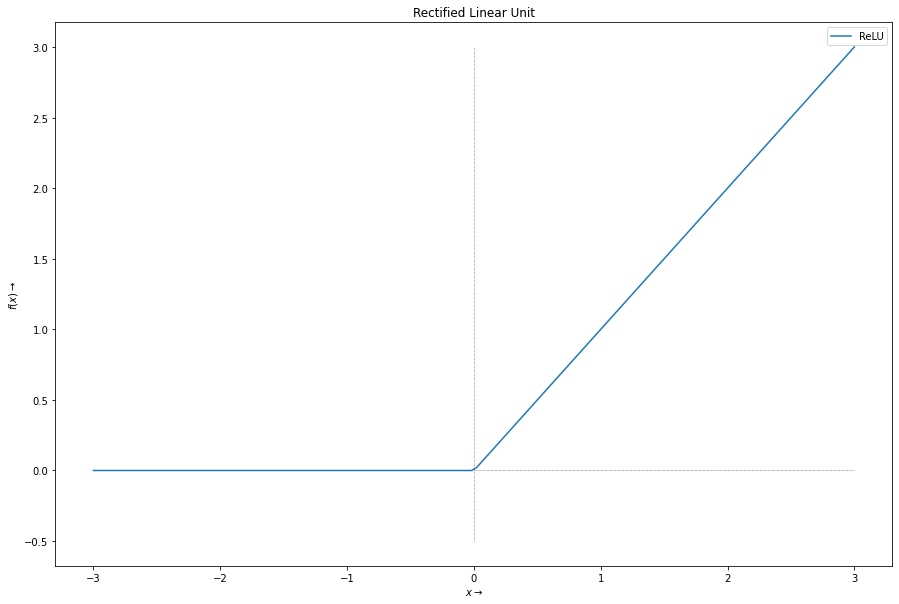

In [19]:
x = np.linspace(start=-3, stop=3, num=150).reshape((150, 1))

def relu(x):
    return np.maximum(x, 0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x, relu(x), label="ReLU")
ax.vlines(x=0, ymax=3, ymin=-0.5, linestyles="dotted", 
    colors="black", linewidths=0.5)
ax.hlines(y = 0, xmin=np.amin(x), xmax=np.amax(x), 
    linestyles="dotted", colors="black", linewidths=0.5)

ax.set_title("Rectified Linear Unit")
ax.set_ylabel("$f(x) \\rightarrow$")
ax.set_xlabel("$x \\rightarrow$")

plt.legend()
plt.show()

## # leaky-ReLU
This is a modified version of the ReLU, such that the function remains differentiable at $x = 0$.

$$
\begin{align*}
L-ReLU(x) & = max\{kx, x\} \\
\text{where, }& 0 \lt k \ll 1 \text{, and could be a hyper-parameter} \\
& x \in \mathbb{R}
\end{align*}
$$

**Why do we need leaky-ReLU?** this is used to solve the _dying ReLU_ problem - for example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold.

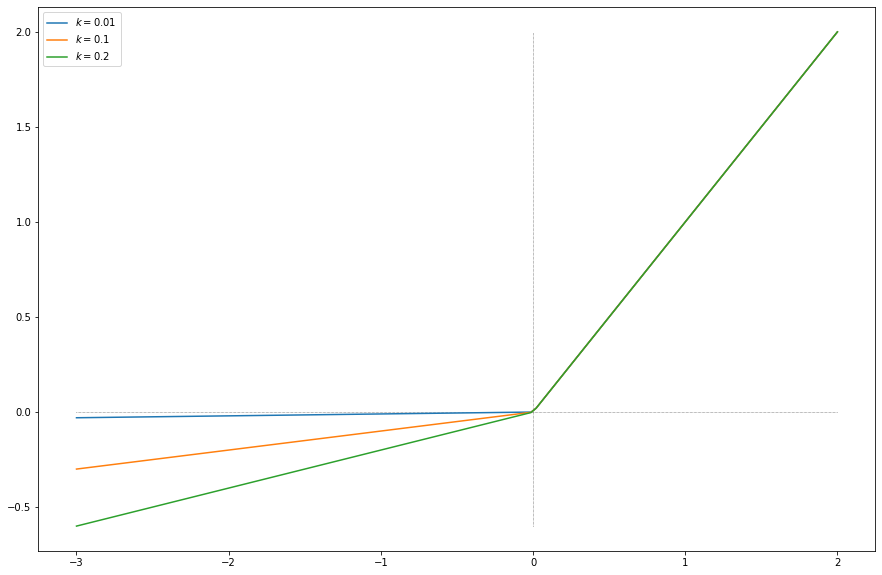

In [27]:
x = np.linspace(start=-3, stop=2, num=150).reshape((150, 1))

def leaky_relu(x, k):
    return np.maximum(x*k, x)

k = np.array([0.01, 0.1, 0.2]).reshape((1, 3))
y = leaky_relu(x, k)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(x, y[:, 0], label=f"$k = {k[0, 0]}$")
ax.plot(x, y[:, 1], label=f"$k = {k[0, 1]}$")
ax.plot(x, y[:, 2], label=f"$k = {k[0, 2]}$")

ax.vlines(x=0, ymax=np.amax(y), ymin=np.amin(y), linestyles="dotted", 
    colors="black", linewidths=0.5)
ax.hlines(y = 0, xmin=np.amin(x), xmax=np.amax(x), 
    linestyles="dotted", colors="black", linewidths=0.5)

plt.legend()
plt.show()